# Final Project 

In [50]:
# import all libararies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# read both datasets: 
df1 = pd.read_csv('../csvs/winequality-red.csv', delimiter=';')
df2 = pd.read_csv('../csvs/winequality-white.csv', delimiter=';')

## Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
### This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.


## Attribute Information:

0. Date (DD/MM/YYYY)
1. Time (HH.MM.SS)
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. True hourly averaged NOx concentration in ppb (reference analyzer)
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. Temperature in Â°C
13. Relative Humidity (%)
14. AH Absolute Humidity

##  Data Manipulation

In [3]:
# combine both datasets into one

In [4]:
# do some manipulation on the dataset

In [5]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df1.shape

(1599, 12)

In [8]:
df1.isnull().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [9]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
display(df1[:3], df2[:3])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [12]:
df3 = pd.merge(df1, df2)

In [13]:
df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7
1,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7
2,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5


In [14]:
df3.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,6.433333,0.250000,0.256667,2.166667,0.023000,43.000000,111.666667,0.991563,3.280000,0.406667,10.966667,6.333333
std,0.461880,0.051962,0.040415,0.404145,0.019053,12.124356,20.207259,0.001599,0.034641,0.028868,1.270171,1.154701
min,5.900000,0.190000,0.210000,1.700000,0.012000,36.000000,100.000000,0.990640,3.260000,0.390000,9.500000,5.000000
25%,6.300000,0.235000,0.245000,2.050000,0.012000,36.000000,100.000000,0.990640,3.260000,0.390000,10.600000,6.000000
50%,6.700000,0.280000,0.280000,2.400000,0.012000,36.000000,100.000000,0.990640,3.260000,0.390000,11.700000,7.000000
75%,6.700000,0.280000,0.280000,2.400000,0.028500,46.500000,117.500000,0.992025,3.290000,0.415000,11.700000,7.000000
max,6.700000,0.280000,0.280000,2.400000,0.045000,57.000000,135.000000,0.993410,3.320000,0.440000,11.700000,7.000000


In [15]:
df3.shape

(3, 12)

In [16]:
df3.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Data Analysis and Visualization

### Work with red wine

In [17]:
df1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [18]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

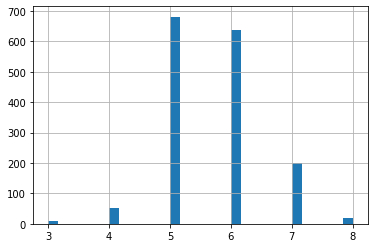

In [21]:
quality = df1['quality']
quality.hist(bins=30)

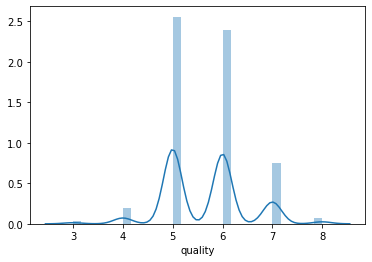

In [24]:
sns.distplot(df1['quality'])

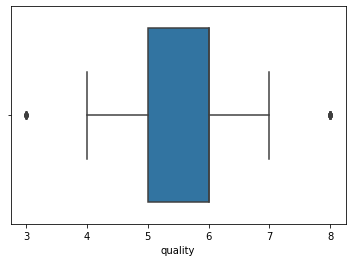

In [25]:
sns.boxplot(df1['quality'])

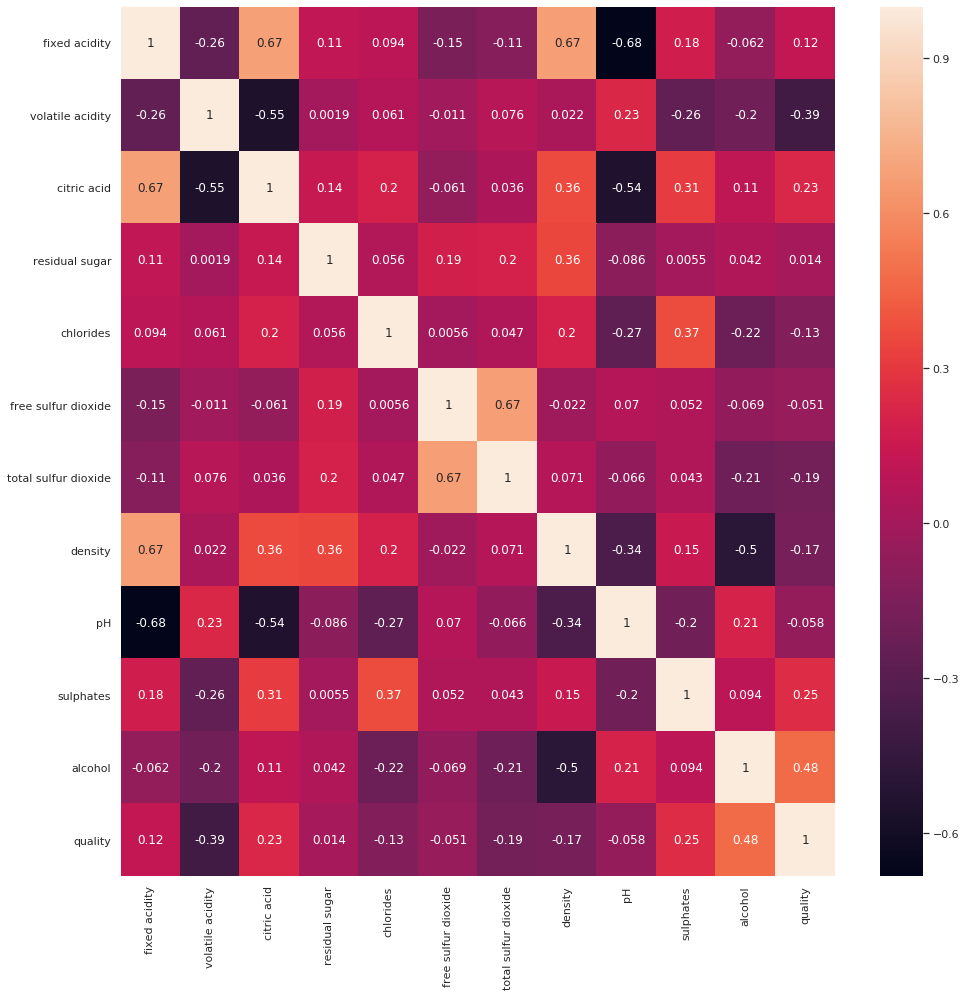

In [26]:
corr=df1.corr()
sns.set(rc={'figure.figsize':(16,16)})
sns.heatmap(corr, annot=True)

In [28]:
df1.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [36]:
for i in range(len(df1.corr()['quality'])):
    print(df1.corr()["quality"][i], df1.corr()["quality"].index[i])

0.1240516491132247 fixed acidity
-0.3905577802640094 volatile acidity
0.2263725143180432 citric acid
0.013731637340066346 residual sugar
-0.12890655993005312 chlorides
-0.05065605724427643 free sulfur dioxide
-0.18510028892653843 total sulfur dioxide
-0.17491922778335006 density
-0.0577313912053823 pH
0.25139707906926206 sulphates
0.47616632400114156 alcohol
1.0 quality


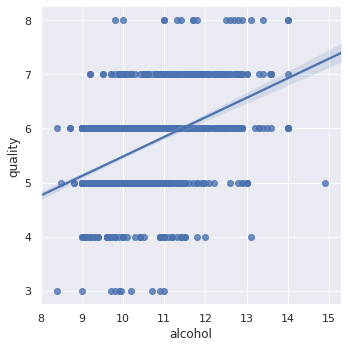

In [37]:
sns.lmplot(data=df1, x="alcohol", y="quality")

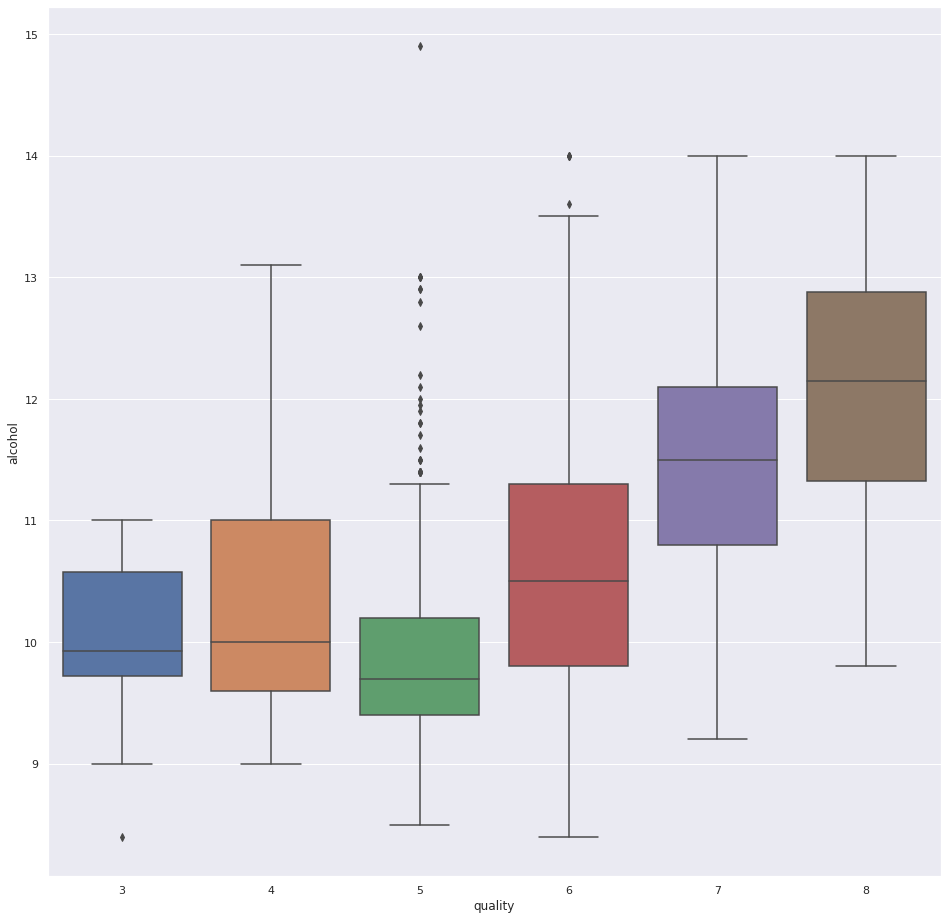

In [39]:
sns.boxplot(x='quality', y='alcohol', data=df1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


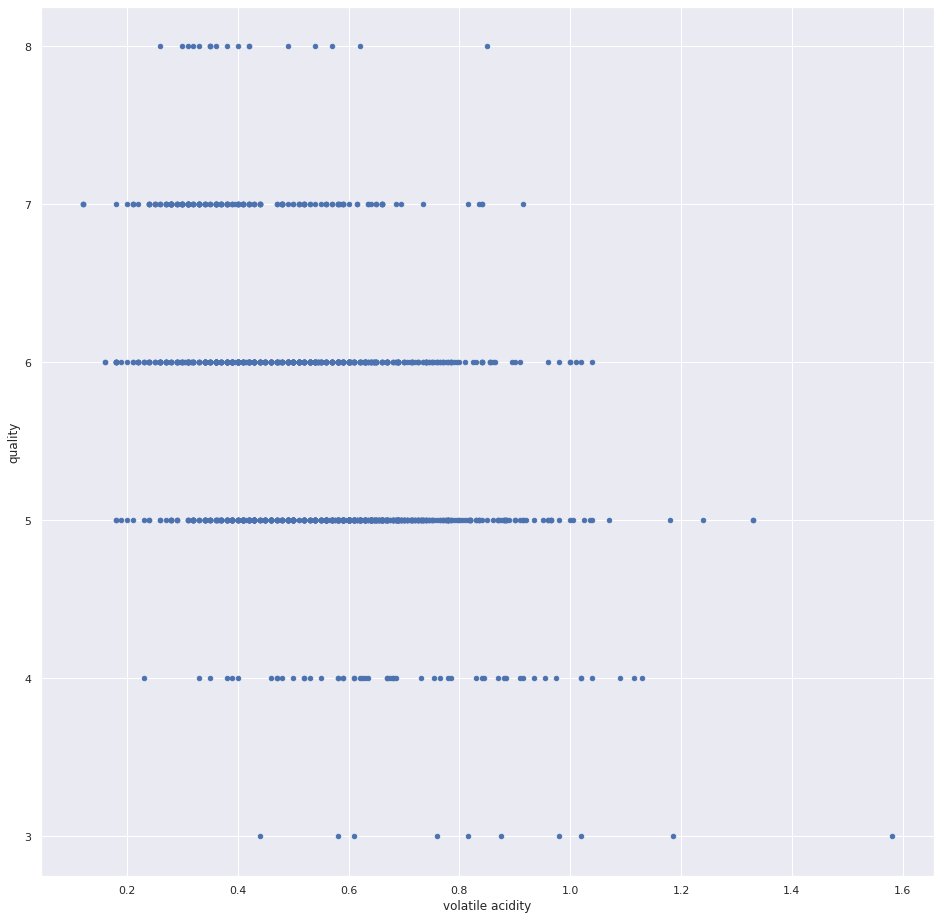

In [45]:
data = pd.concat([df1['quality'], df1['volatile acidity']], axis=1)
data.plot.scatter(x="volatile acidity", y='quality');

In [38]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [47]:
feature_cols = ['alcohol', 'volatile acidity']
X = df1[feature_cols]
y = df1['quality']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

3.169412645942406
[ 0.3079141  -1.42976411]


In [53]:
y_predicted = lin_reg.predict(X_test)

In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 0.5036260053681864
Mean Squared Error: 0.418999090504211
Root Mean Squared Error: 0.6473013907788326


In [55]:
df_check = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_predicted
})

We just do some lin_reg for out RED wine

In [56]:
df_check.head()

,Actual,Predicted
1415,5,5.234542
788,6,5.478677
1445,6,5.003023
847,6,5.245523
1088,7,5.631559


In [76]:
df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Merge 2 df, and get one with new column type

In [95]:
df3 = pd.merge(df1, df2,how = "outer", indicator=True)
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,_merge
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,left_only
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,left_only
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,left_only
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,left_only
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,right_only
6491,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,right_only
6492,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,right_only
6493,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,right_only


In [96]:
df3 = df3.replace(to_replace='right_only', value=0)
df3 = df3.replace(to_replace='left_only', value=1)

In [97]:
df3 = df3.rename(columns={"_merge": "type"})

In [98]:
df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1


In [104]:
df3['type'].values.count

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [78]:
df3.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

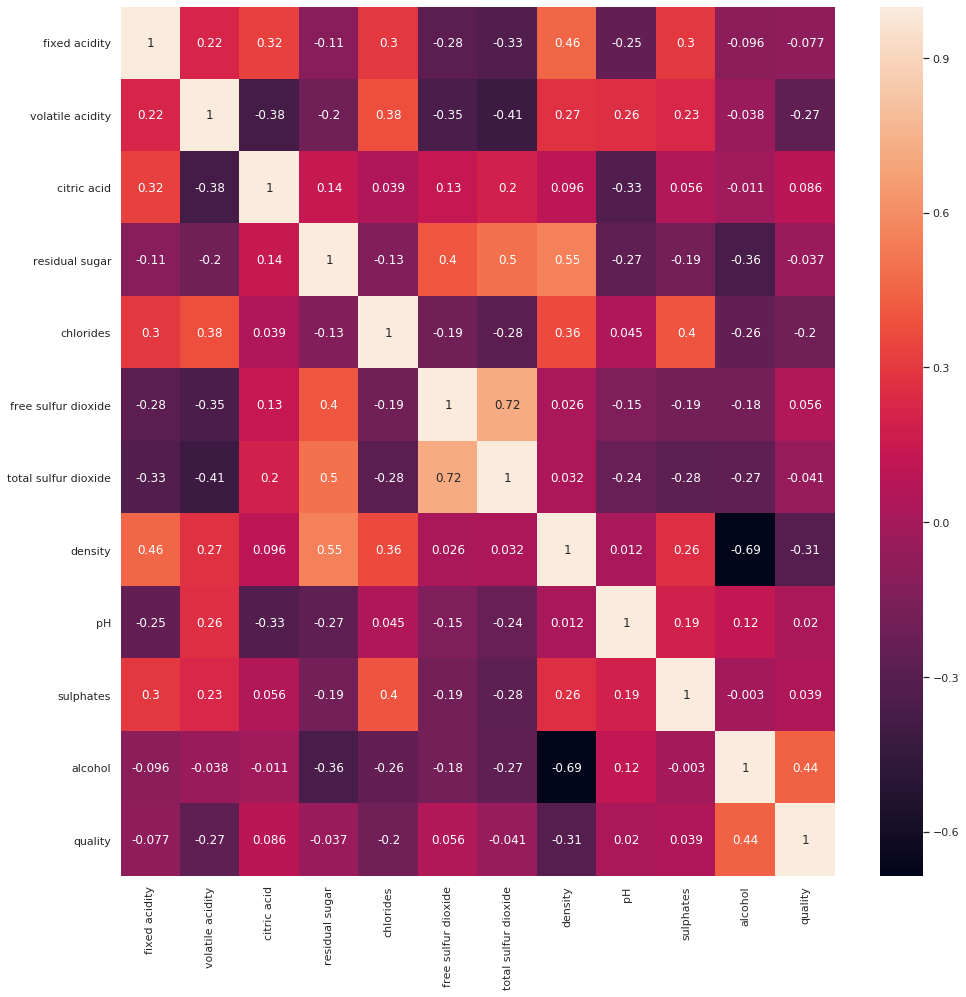

In [80]:
corr=df3.corr()
sns.set(rc={'figure.figsize':(16,16)})
sns.heatmap(corr, annot=True)

In [85]:
for j in df3.corr():
    for i in range(len(df3.corr()[j])):
        if df3.corr()[j][i] == 1 or df3.corr()[j][i] == -1:
            continue
        if df3.corr()[j][i] > 0.5 or df3.corr()[j][i] < -0.5:
            print(df3.corr().index[i], j, df3.corr()[j][i])

density residual sugar 0.5524611234113441
total sulfur dioxide free sulfur dioxide 0.7210086148847824
free sulfur dioxide total sulfur dioxide 0.7210086148847824
residual sugar density 0.5524611234113441
alcohol density -0.6867866801811746
density alcohol -0.6867866801811746


In [105]:
feature_cols = ['alcohol', 'volatile acidity']
X = df3[feature_cols]
y = df3['quality']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2) 

In [107]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

3.0210210981417074
[ 0.3116333  -1.39062317]


In [110]:
y_predicted = lin_reg.predict(X_test)

In [111]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 0.5814146888068911
Mean Squared Error: 0.5508410916674716
Root Mean Squared Error: 0.7421866959650191


In [112]:
df_check = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_predicted
})
df_check.head()

,Actual,Predicted
4837,5,5.699559
2906,5,5.786850
4294,6,5.911001
1985,7,6.150255
5755,7,5.509731


## Conclusion: 

All of things is pretty good
Cause we have not good corr coef with quality we taken 2 highest correlated features and work with them